## Trabajo práctico N°1

Alumna: Clara Bureu

#### Importo las librerías

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#### Cargo las imágenes de la carpeta coord_cromaticas

In [3]:
img1 = cv.imread('coord_cromaticas/CoordCrom_1.png')
img2 = cv.imread('coord_cromaticas/CoordCrom_2.png')
img3 = cv.imread('coord_cromaticas/CoordCrom_3.png')

img_crom = [img1, img2, img3]

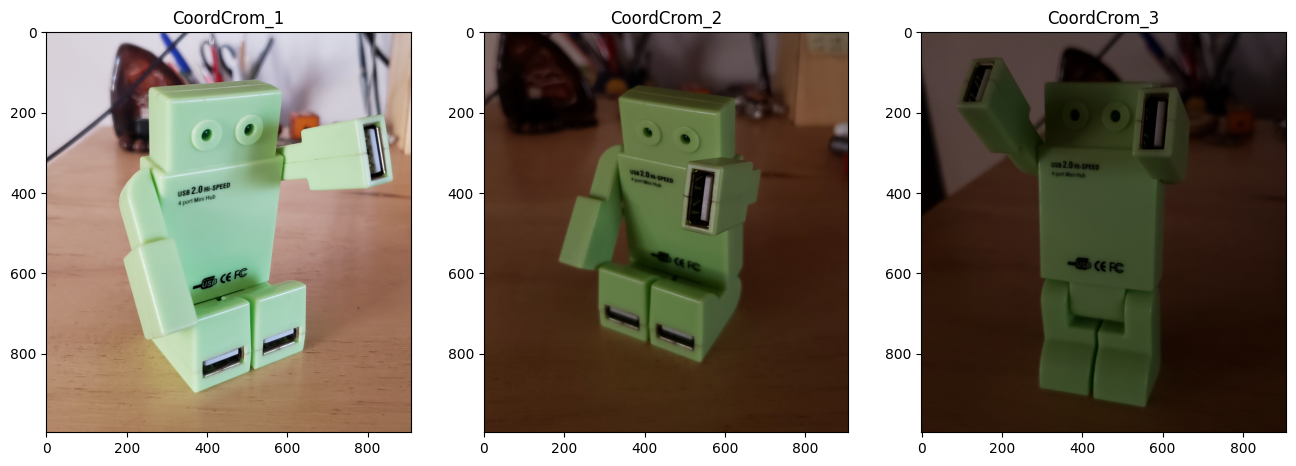

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(16, 10))

for i, img in enumerate(img_crom):
    plt.subplot(1, 3, i + 1) 
    imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.imshow(imgRGB)
    plt.title(f'CoordCrom_{i + 1}')


#### Transformación cromática

In [22]:
def coor_cromatica(img):
    img_crom = img.copy()
    im_r, im_g, im_b = cv.split(img_crom)
    R_G_B = im_r + im_g + im_b
    R_G_B[R_G_B == 0] = 1  # Evitar divisiones por cero
    im_r_crom = im_r / R_G_B
    im_g_crom = im_g / R_G_B
    im_b_crom = im_b / R_G_B
    img_crom = cv.merge((im_r_crom, im_g_crom, im_b_crom))

    return img_crom

In [23]:
img_crom_processed = [coor_cromatica(img) for img in img_crom]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


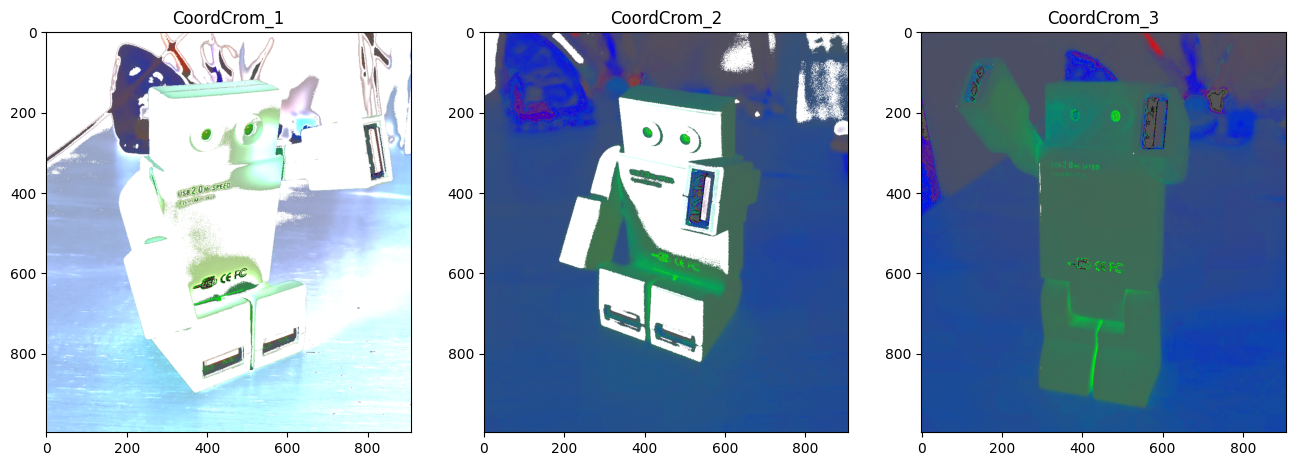

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(16, 10))

for i, img in enumerate(img_crom_processed):
    plt.subplot(1, 3, i + 1) 
    plt.imshow(img_crom_processed[i])
    plt.title(f'CoordCrom_{i + 1}')

#### Cargo las imágenes de la carpeta white_patch

In [31]:
img_blue = cv.imread('white_patch/wp_blue.jpg')
#img_green = cv.imread('white_patch/wp_green.png')
img_green2 = cv.imread('white_patch/wp_green2.jpg')
#img_red = cv.imread('white_patch/wp_red.png')
img_red2 = cv.imread('white_patch/wp_red2.jpg')

img_wp = [img_blue, img_green2, img_red2]

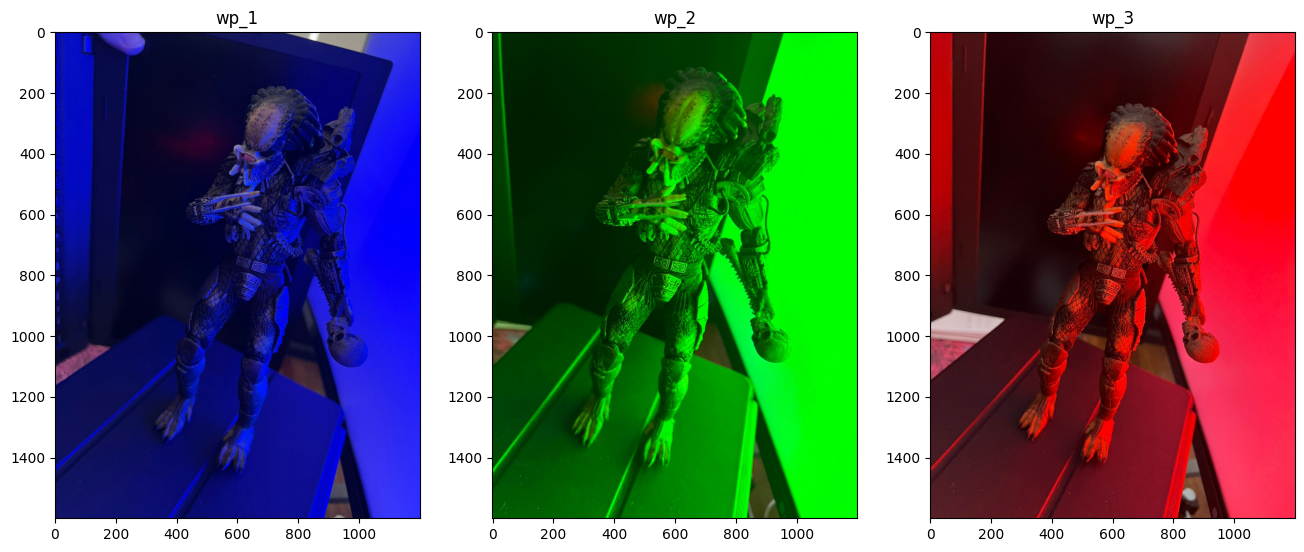

In [32]:
fig, axs = plt.subplots(1, 3, figsize=(16, 10))

for i, img in enumerate(img_wp[:]):
    plt.subplot(1, 3, i + 1)
    imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.imshow(imgRGB)
    plt.title(f'wp_{i + 1}')

plt.show()

#### White Patch

In [33]:
def white_patch(img):

    im_r, im_g, im_b = cv.split(img)

    max_r = np.max(im_r)
    max_g = np.max(im_g)
    max_b = np.max(im_b)

    im_r_corr = (im_r / max_r) * 255
    im_g_corr = (im_g / max_g) * 255
    im_b_corr = (im_b / max_b) * 255

    img_white_balanced = cv.merge((im_r_corr, im_g_corr, im_b_corr))

    return img_white_balanced

In [35]:
img_white_balanced = [white_patch(img) for img in img_wp]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


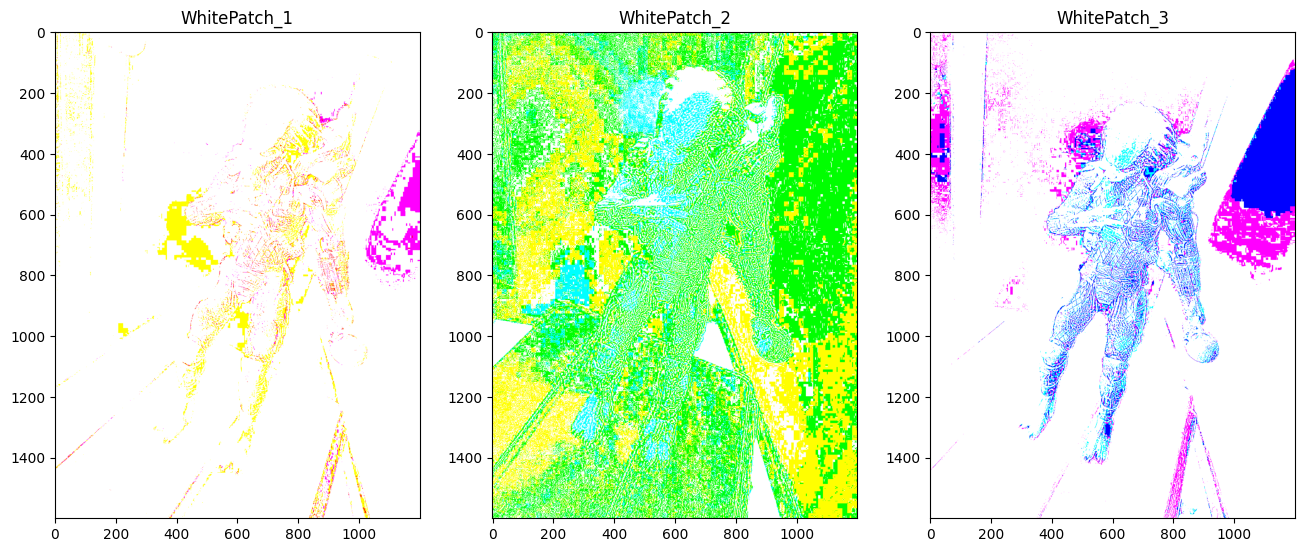

In [48]:
fig, axs = plt.subplots(1, 3, figsize=(16, 10))

for i, img in enumerate(img_white_balanced):
    plt.subplot(1, 3, i + 1) 
    plt.imshow(img)
    plt.title(f'WhitePatch_{i + 1}')